<a href="https://colab.research.google.com/github/Alisha210302/NLP/blob/main/26_LSTM_GRU_for_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Library for in-built tensorflow datasets

In [ ]:
pip install tensorflow-datasets

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
imdb , info = tfds.load("imdb_reviews",with_info=True,as_supervised=True)

In [ ]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir='/root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0',
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
    

In [ ]:
type(imdb)

dict

In [ ]:
train_data , test_data = imdb['train'], imdb['test']

In [ ]:
imdb.keys()

dict_keys(['train', 'test', 'unsupervised'])

In [ ]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [ ]:
len(training_sentences)

25000

In [ ]:
print(training_sentences[21])

b'In a time of magic, barbarians and demons abound a diabolical tyrant named Nekhron and his mother Queen Juliane who lives in the realm of ice and wants to conquer the region of fire ruled by the King Jerol but when his beautiful daughter Princess Teegra has been kidnapped by Nekhron\'s goons, a warrior named Larn must protect her and must defeat Nekhron from taking over the world and the kingdom with the help of an avenger named Darkwolf.<br /><br />A nicely done and excellent underrated animated fantasy epic that combines live actors with animation traced over them ( rotoscoping), it\'s Ralph Bakshi\'s second best movie only with "American Pop" being number one and "Heavy Traffic" being third and "Wizards" being fourth. It\'s certainly better than his "Cool World" or "Lord of the Rings", the artwork is designed by famed artist Frank Farzetta and the animation has good coloring and there\'s also a hottie for the guys.<br /><br />I highly recommend this movie to fantasy and animation 

In [ ]:
print(training_labels[21])

1


In [ ]:
len(training_sentences), len(training_labels)

(25000, 25000)

In [ ]:
len(testing_sentences), len(testing_labels)

(25000, 25000)

In [ ]:
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

### Preprocessing

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(num_words=10000)

In [ ]:
tokenizer.fit_on_texts(training_sentences)

In [ ]:
word_index = tokenizer.word_index

In [ ]:
word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 "'s": 20,
 'on': 21,
 'you': 22,
 'not': 23,
 'are': 24,
 'his': 25,
 'he': 26,
 'have': 27,
 'be': 28,
 'one': 29,
 'all': 30,
 'at': 31,
 'by': 32,
 'they': 33,
 'an': 34,
 'who': 35,
 'so': 36,
 'from': 37,
 'like': 38,
 'her': 39,
 "'t": 40,
 'or': 41,
 'just': 42,
 'there': 43,
 'about': 44,
 'out': 45,
 "'": 46,
 'has': 47,
 'if': 48,
 'some': 49,
 'what': 50,
 'good': 51,
 'more': 52,
 'very': 53,
 'when': 54,
 'she': 55,
 'up': 56,
 'can': 57,
 'b': 58,
 'time': 59,
 'no': 60,
 'even': 61,
 'my': 62,
 'would': 63,
 'which': 64,
 'story': 65,
 'only': 66,
 'really': 67,
 'see': 68,
 'their': 69,
 'had': 70,
 'were': 71,
 'me': 72,
 'well': 73,
 'we': 74,
 'than': 75,
 'much': 76,
 'been': 77,
 'get': 78,
 'bad': 79,
 'will': 80,
 'people': 81,
 'do': 82,
 'also': 83,


In [ ]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=500,truncating='post')
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=500,truncating='post',padding='pre')

In [ ]:
padded

array([[   0,    0,    0, ...,  873,  144,    9],
       [   0,    0,    0, ...,   31,   30,   46],
       [   0,    0,    0, ...,    8, 6175,   46],
       ...,
       [7628,   36,   10, ...,   20,   83,    1],
       [   0,    0,    0, ..., 1320,   22,   46],
       [   0,    0,    0, ..., 1697,  661,   46]], dtype=int32)

In [ ]:
padded.shape

(25000, 500)

### Import the libraries

In [ ]:
from keras.layers import Embedding, SimpleRNN, Bidirectional, LSTM, GRU,Dense
from keras.models import Sequential

### Build simple RNN model

In [ ]:
model_rnn = Sequential([
    Input(shape=(50,)), # Explicitly define input shape for Embedding layer
    Embedding(input_dim=10000, output_dim=128, input_length=50),  # Define input shape explicitly
    SimpleRNN(32),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model_rnn.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ (None, 50, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_8 (SimpleRNN)             │ (None, 32)                  │           5,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,285,493 (4.90 MB)

 Trainable params: 1,285,493 (4.90 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_rnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model_rnn.fit(padded, training_labels, epochs=10, validation_data=(testing_padded, testing_labels))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 176ms/step - accuracy: 0.6169 - loss: 0.6357 - val_accuracy: 0.7488 - val_loss: 0.5319
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 160s 200ms/step - accuracy: 0.7810 - loss: 0.4728 - val_accuracy: 0.7824 - val_loss: 0.4800
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 182s 175ms/step - accuracy: 0.8520 - loss: 0.3523 - val_accuracy: 0.8080 - val_loss: 0.4795
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 146s 180ms/step - accuracy: 0.9380 - loss: 0.1724 - val_accuracy: 0.7852 - val_loss: 0.5492
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 177ms/step - accuracy: 0.9556 - loss: 0.1257 - val_accuracy: 0.7771 - val_loss: 0.9204
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 177ms/step - accuracy: 0.9037 - loss: 0.2537 - val_accuracy: 0.7454 - val_loss: 0.8356
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 138s 176ms/step - accuracy: 0.9873 - loss: 0.0406 - val_accuracy: 0.7776 - val_loss: 0.8823
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 176ms/step - accuracy: 0.9934 -

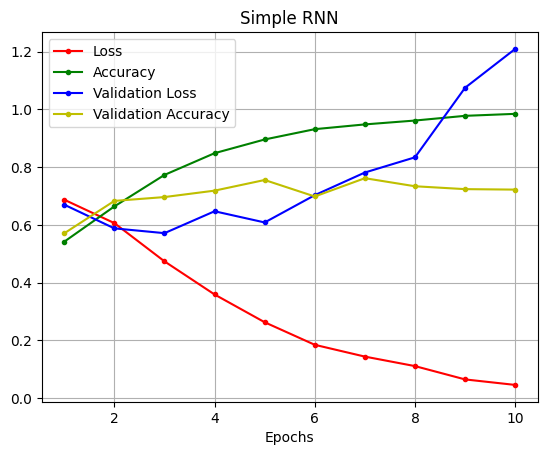

In [ ]:
import matplotlib.pyplot as plt
plt.title('Simple RNN')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11),history.history['loss'],
         color='r',label='Loss',marker='.')
plt.plot(range(1,11),history.history['accuracy'],
         color='g',label='Accuracy',marker='.')
plt.plot(range(1,11),history.history['val_loss'],
         color='b',label='Validation Loss',marker='.')
plt.plot(range(1,11),history.history['val_accuracy'],
         color='y',label='Validation Accuracy',marker='.')
plt.legend(loc='upper left')
plt.show()

### Build LSTM Model

In [ ]:
model_lstm = Sequential([
    Embedding(10000, 50, input_length=50),
    Bidirectional(LSTM(32)),
    Dense(10, activation='relu'),
    Dense(1,activation='sigmoid')
])

In [ ]:
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history_lstm = model_lstm.fit(padded, training_labels, epochs=10, validation_data=(testing_padded, testing_labels))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 384s 485ms/step - accuracy: 0.7229 - loss: 0.5146 - val_accuracy: 0.8576 - val_loss: 0.3371
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 352s 447ms/step - accuracy: 0.8562 - loss: 0.3403 - val_accuracy: 0.8623 - val_loss: 0.3586
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 381s 487ms/step - accuracy: 0.9155 - loss: 0.2227 - val_accuracy: 0.8592 - val_loss: 0.3317
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 358s 457ms/step - accuracy: 0.9468 - loss: 0.1503 - val_accuracy: 0.8692 - val_loss: 0.3821
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 379s 453ms/step - accuracy: 0.9601 - loss: 0.1207 - val_accuracy: 0.8584 - val_loss: 0.3776
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 353s 451ms/step - accuracy: 0.9655 - loss: 0.1029 - val_accuracy: 0.8666 - val_loss: 0.4600
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 384s 453ms/step - accuracy: 0.9789 - loss: 0.0669 - val_accuracy: 0.8606 - val_loss: 0.4552
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 381s 453ms/step - accuracy: 0.9829 -

In [ ]:
plt.title('LSTM Model')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11),history_lstm.history['loss'],
         color='r',label='Loss',marker='.')
plt.plot(range(1,11),history_lstm.history['accuracy'],
         color='g',label='Accuracy',marker='.')
plt.plot(range(1,11),history_lstm.history['val_loss'],
         color='b',label='Validation Loss',marker='.')
plt.plot(range(1,11),history_lstm.history['val_accuracy'],
         color='y',label='Validation Accuracy',marker='.')
plt.legend(loc='upper left')
plt.show()

NameError: name 'plt' is not defined

### GRU Model

In [ ]:
model_gru = Sequential([
    Embedding(10000, 50, input_length=50),
    Bidirectional(GRU(32)),
    Dense(10, activation='relu'),
    Dense(1,activation='sigmoid')
])

In [ ]:
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history_gru = model_gru.fit(padded, training_labels, epochs=10, validation_data=(testing_padded, testing_labels))

In [ ]:
plt.title('GRU Model')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11),history_gru.history['loss'],
         color='r',label='Loss',marker='.')
plt.plot(range(1,11),history_gru.history['accuracy'],
         color='g',label='Accuracy',marker='.')
plt.plot(range(1,11),history_gru.history['val_loss'],
         color='b',label='Validation Loss',marker='.')
plt.plot(range(1,11),history_gru.history['val_accuracy'],
         color='y',label='Validation Accuracy',marker='.')
plt.legend(loc='upper left')
plt.show()

### Plot all the graphs together

In [ ]:
plt.subplot(2,2,1)
plt.title('Simple RNN')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11),history.history['loss'],
         color='r',label='Loss',marker='.')
plt.plot(range(1,11),history.history['accuracy'],
         color='g',label='Accuracy',marker='.')
plt.plot(range(1,11),history.history['val_loss'],
         color='b',label='Validation Loss',marker='.')
plt.plot(range(1,11),history.history['val_accuracy'],
         color='y',label='Validation Accuracy',marker='.')
plt.legend(loc='upper left')



plt.subplot(2,2,2)
plt.title('LSTM Model')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11),history_lstm.history['loss'],
         color='r',label='Loss',marker='.')
plt.plot(range(1,11),history_lstm.history['accuracy'],
         color='g',label='Accuracy',marker='.')
plt.plot(range(1,11),history_lstm.history['val_loss'],
         color='b',label='Validation Loss',marker='.')
plt.plot(range(1,11),history_lstm.history['val_accuracy'],
         color='y',label='Validation Accuracy',marker='.')
plt.legend(loc='upper left')

plt.subplot( 2,2,3)
plt.title('GRU Model')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11),history_gru.history['loss'],
         color='r',label='Loss',marker='.')
plt.plot(range(1,11),history_gru.history['accuracy'],
         color='g',label='Accuracy',marker='.')
plt.plot(range(1,11),history_gru.history['val_loss'],
         color='b',label='Validation Loss',marker='.')
plt.plot(range(1,11),history_gru.history['val_accuracy'],
         color='y',label='Validation Accuracy',marker='.')
plt.legend(loc='upper left')

plt.subplot(2,2,2)
plt

In [ ]:
new1 = 'This was a worst movie. Please do not watch it. Waste of money and time.'
new2 = 'A must watch movie. I loved to watch it. It was just amazing.'

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,4,1)
plt.plot(range(1,11),history.history['loss'],color='r',label='Loss',marker='.')
plt.plot(range(1,11),history_lstm.history['loss'],color='b',label='Loss',marker='.')
plt.plot(range(1,11),history_gru.history['loss'],color='g',label='Loss',marker='.')

plt.subplot(1,4,2)
plt.plot(range(1,11),history.history['accuracy'],color='r',label='Accuracy',marker='.')
plt.plot(range(1,11),history_lstm.history['accuracy'],color='g',label='Accuracy',marker='.')
plt.plot(range(1,11),history_gru.history['accuracy'],color='b',label='Accuracy',marker='.')


plt.subplot(1,4,3)
plt.plot(range(1,11),history.history['val_loss'],color='r',label='Validation Loss',marker='.')
plt.plot(range(1,11),history_lstm.history['val_loss'],color='g',label='Validation Loss',marker='.')
plt.plot(range(1,11),history_gru.history['val_loss'], color='b',label='Validation Loss',marker='.')



plt.subplot(1,4,4)
plt.plot(range(1,11),history.history['val_accuracy'],color='r',label='Validation Accuracy',marker='.')
plt.plot(range(1,11),history_lstm.history['val_accuracy'],color='g',label='Validation Accuracy',marker='.')
plt.plot(range(1,11),history_gru.history['val_accuracy'],color='b',label='Validation Accuracy',marker='.')


In [ ]:
def predict(model,text):
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=100, truncating= 'post')

    result = model.predict(pad, verbose = False)
    percent_pos= result[0,0]
    if round(percent_pos) == 0:
        return(1-percent_pos, 'NEGATIVE')
    else:
        return (percent_pos, 'POSITIVE')

In [ ]:
predict(model_rnn,new1)